In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics  import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier    
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

In [3]:
accuracies = dict()

In [4]:
df = pd.read_csv('accelerometer.csv')
df.shape

(153000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [6]:
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [7]:
df.describe()

,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


In [8]:
df.isna().sum()

wconfid    0
pctid      0
x          0
y          0
z          0
dtype: int64

In [9]:
scaler = MinMaxScaler(feature_range=(-10,10))
df['pctid'] = scaler.fit_transform(df[['pctid']])


In [10]:
df.describe()

,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,0.000000,0.995622,0.005351,-0.117769
std,0.816499,6.123744,0.773958,0.742602,0.517008
min,1.000000,-10.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,-5.000000,0.945000,-0.078000,-0.172000
50%,2.000000,0.000000,0.992000,0.008000,-0.125000
75%,3.000000,5.000000,1.039000,0.105000,-0.066000
max,3.000000,10.000000,7.996000,7.996000,6.086000


In [11]:
x = df.drop(['wconfid'],axis=1)
y = df['wconfid'].values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=30)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((122400, 4), (30600, 4), (122400,), (30600,))

In [14]:
def calculate_accuracy(actual,predicted,obj):
    acc = accuracy_score(actual,predicted)
    score = round(acc*100,2)
    print(f'Accuracy Score: {score}%')
    cnfmt = confusion_matrix(actual,predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnfmt)
    disp.plot()
    accuracies.update({obj:score})
    plt.savefig(f'confusion_matrics/{obj}.png')

In [15]:
def process_classification(object_class):
    try:
        obj = object_class()
        print(obj,end=' ')
        obj.fit(x_train,y_train)
        obj_pred = obj.predict(x_test)
        calculate_accuracy(y_test,obj_pred,obj)
    except Exception as e:
        print(e)

In [16]:
class_objects = [
    ExtraTreeClassifier,
    DecisionTreeClassifier,
    OneClassSVM,
    MLPClassifier,
    # RadiusNeighborsClassifier,
    KNeighborsClassifier,
    # ClassifierChain,
    # MultiOutputClassifier,
    # OutputCodeClassifier,
    # OneVsOneClassifier,
    # OneVsRestClassifier,
    SGDClassifier,
    RidgeClassifierCV,
    RidgeClassifier,
    PassiveAggressiveClassifier,
    # GaussianProcessClassifier,
    # VotingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    BernoulliNB,
    CalibratedClassifierCV,
    GaussianNB,
    # LabelPropagation,
    # LabelSpreading,
    LinearDiscriminantAnalysis,
    LinearSVC,
    LogisticRegression,
    LogisticRegressionCV,
    SGDClassifier,
    # MultinomialNB,
    NearestCentroid,
    KNeighborsClassifier,
    NuSVC,
    Perceptron,
    QuadraticDiscriminantAnalysis,
    SVC,
    BayesianGaussianMixture,
    GaussianMixture,
]

ExtraTreeClassifier() Accuracy Score: 65.91%
DecisionTreeClassifier() Accuracy Score: 66.98%
OneClassSVM() Accuracy Score: 13.12%
MLPClassifier() 

/home/daniyal/working/envs/mlproject/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy Score: 66.75%
KNeighborsClassifier() Accuracy Score: 71.84%
SGDClassifier() Accuracy Score: 34.03%
RidgeClassifierCV() Accuracy Score: 31.26%
RidgeClassifier() Accuracy Score: 31.26%
PassiveAggressiveClassifier() Accuracy Score: 31.81%
AdaBoostClassifier() Accuracy Score: 56.97%
GradientBoostingClassifier() Accuracy Score: 65.53%
BaggingClassifier() Accuracy Score: 69.99%
ExtraTreesClassifier() Accuracy Score: 71.25%
RandomForestClassifier() Accuracy Score: 71.53%
BernoulliNB() Accuracy Score: 41.61%
CalibratedClassifierCV() 

/home/daniyal/working/envs/mlproject/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/daniyal/working/envs/mlproject/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/daniyal/working/envs/mlproject/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/daniyal/working/envs/mlproject/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/daniyal/working/envs/mlproject/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy Score: 31.22%
GaussianNB() Accuracy Score: 50.41%
LinearDiscriminantAnalysis() Accuracy Score: 31.36%
LinearSVC() 

/home/daniyal/working/envs/mlproject/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy Score: 31.6%
LogisticRegression() Accuracy Score: 31.46%
LogisticRegressionCV() Accuracy Score: 31.42%
SGDClassifier() 

/home/daniyal/working/envs/mlproject/lib/python3.10/site-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Accuracy Score: 34.29%
NearestCentroid() Accuracy Score: 33.37%
KNeighborsClassifier() Accuracy Score: 71.84%
NuSVC() Accuracy Score: 56.25%
Perceptron() Accuracy Score: 32.67%
QuadraticDiscriminantAnalysis() Accuracy Score: 50.33%
SVC() Accuracy Score: 47.83%
BayesianGaussianMixture() Accuracy Score: 0.0%
GaussianMixture() Accuracy Score: 0.0%


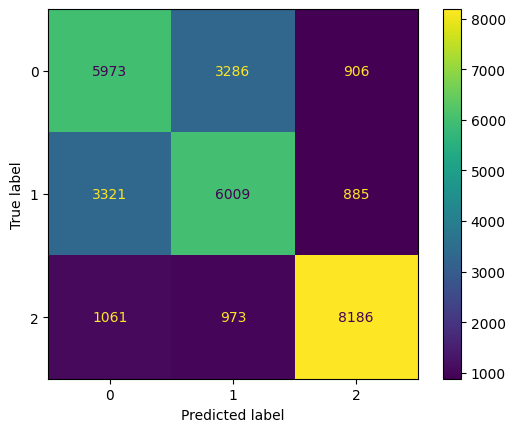

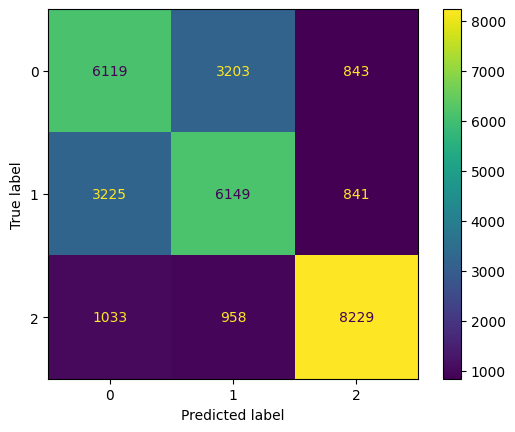

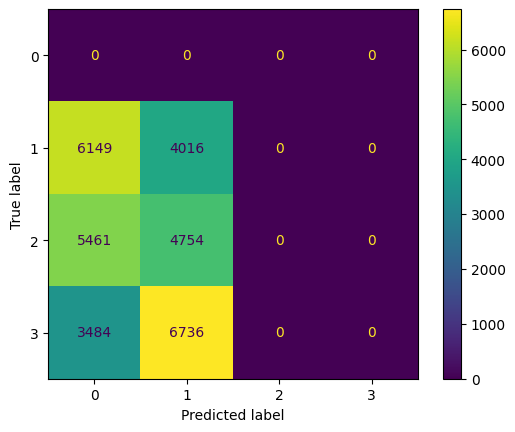

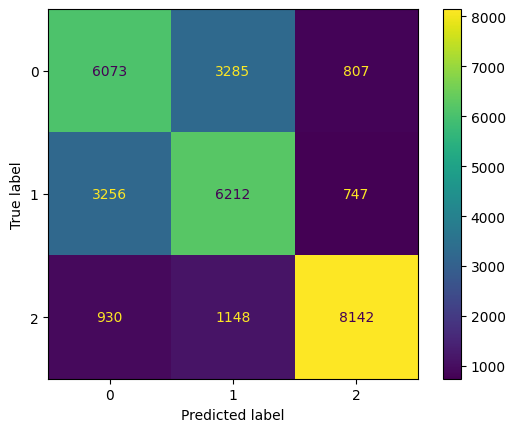

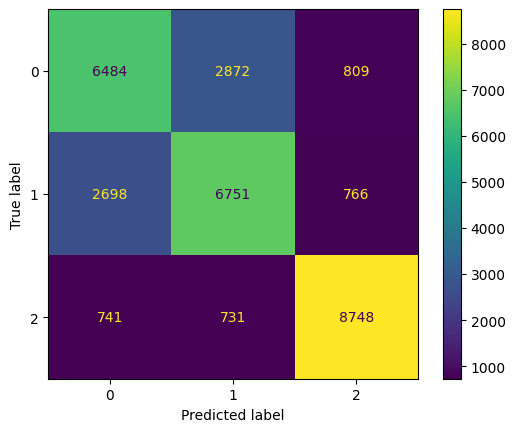

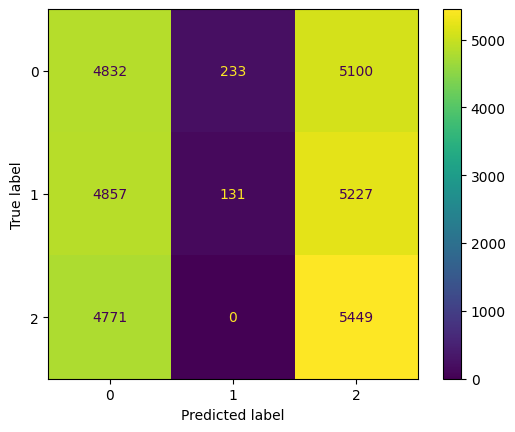

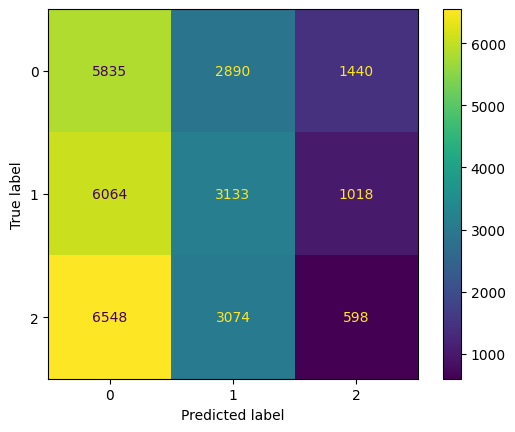

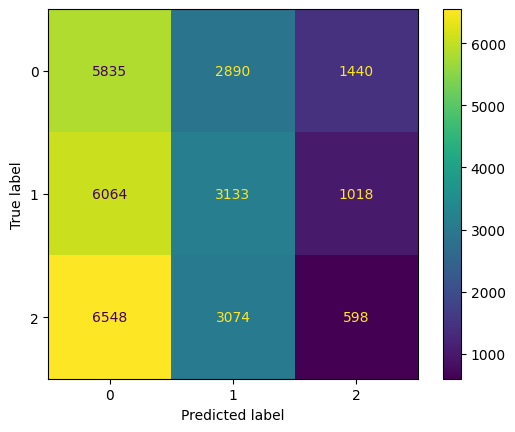

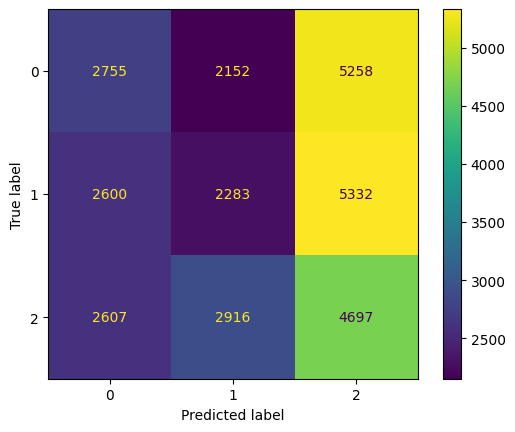

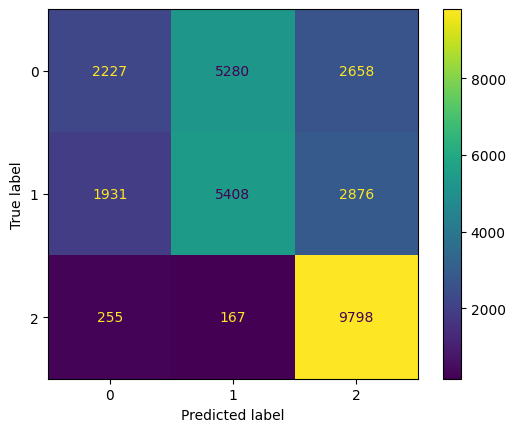

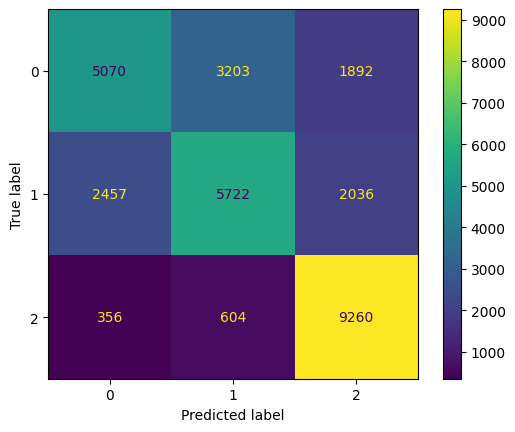

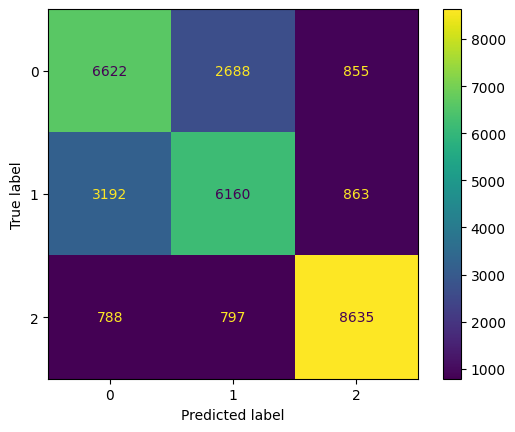

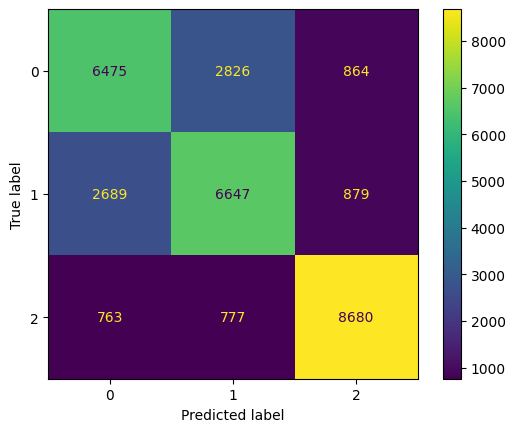

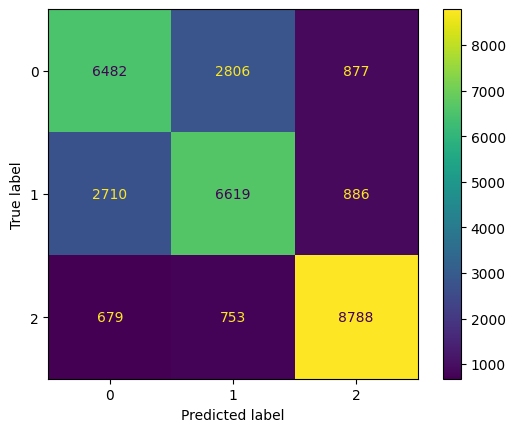

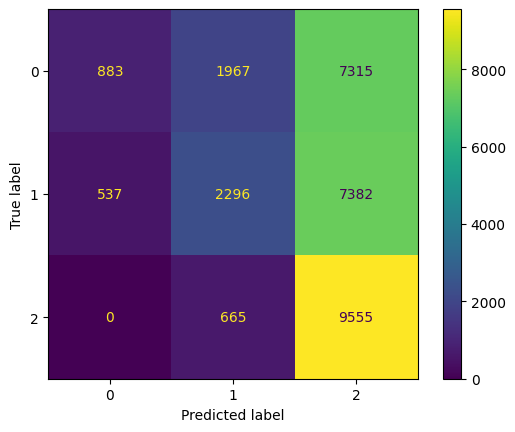

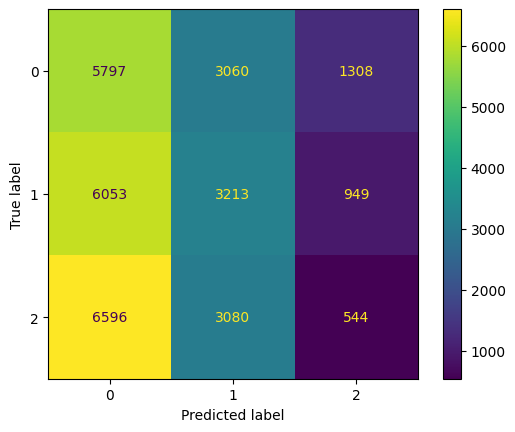

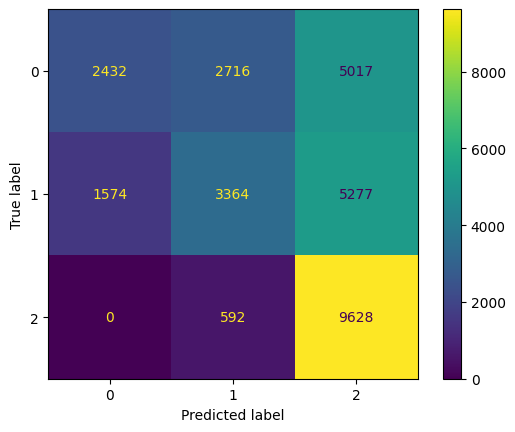

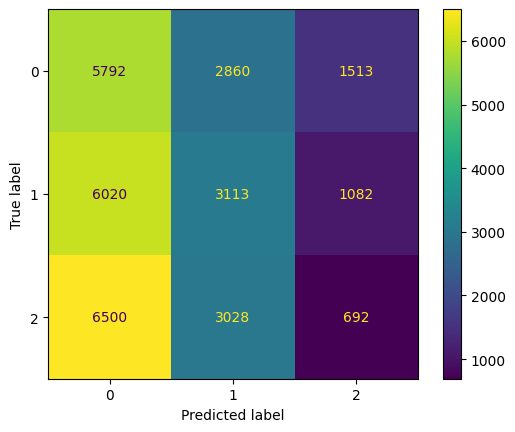

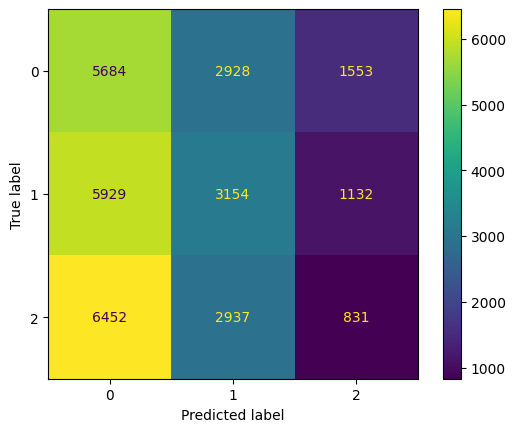

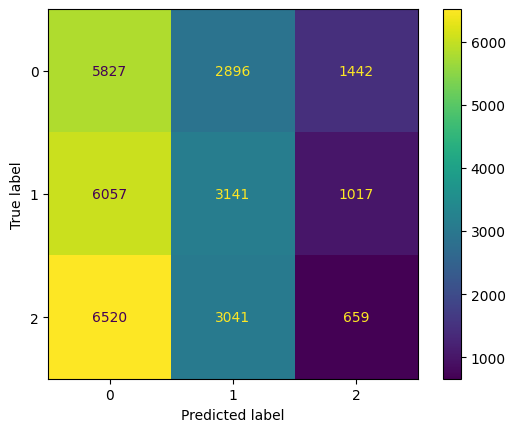

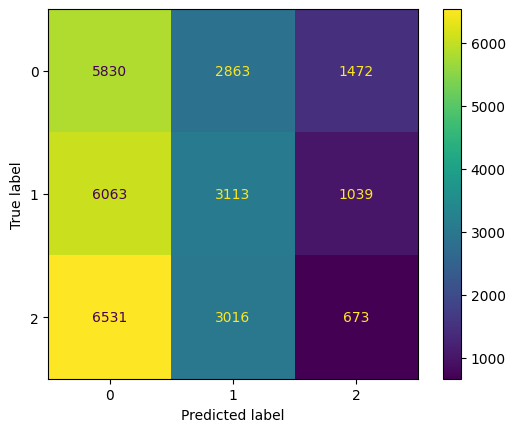

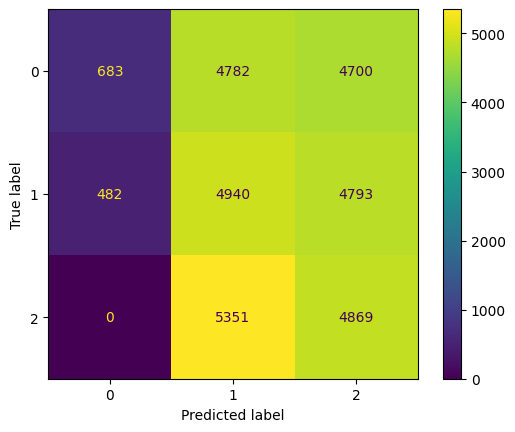

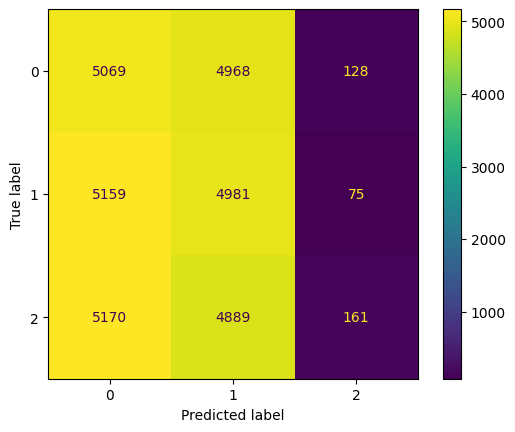

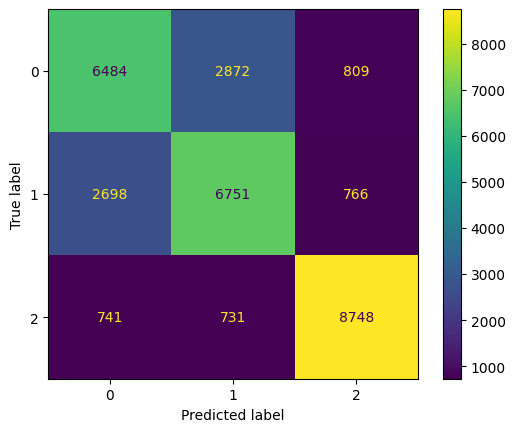

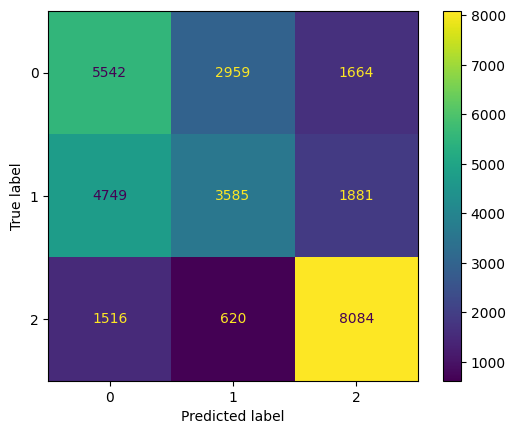

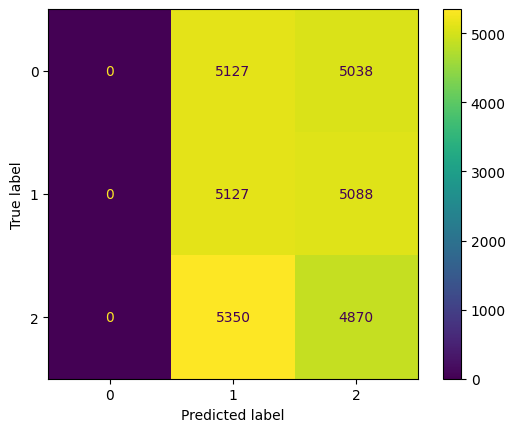

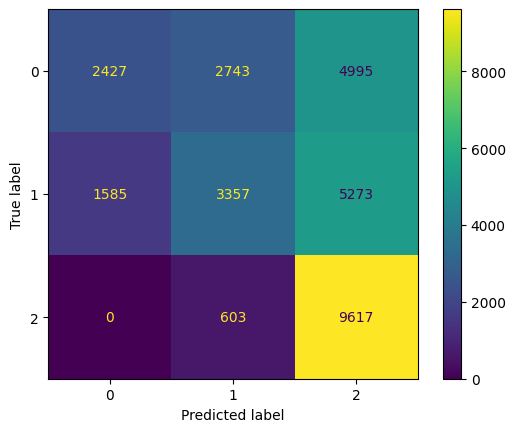

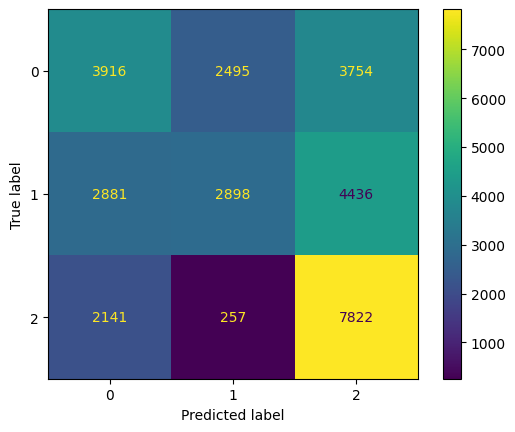

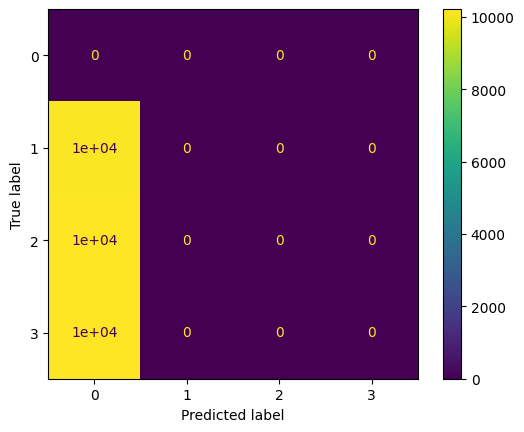

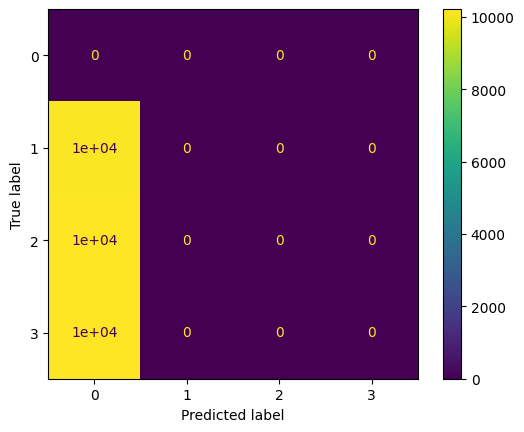

In [17]:
for obj in class_objects:
    process_classification(obj)

In [18]:
accuracies = sorted(accuracies.items(), key=lambda x:x[1],reverse=True)
accuracies

[(KNeighborsClassifier(), 71.84),
 (KNeighborsClassifier(), 71.84),
 (RandomForestClassifier(), 71.53),
 (ExtraTreesClassifier(), 71.25),
 (BaggingClassifier(), 69.99),
 (DecisionTreeClassifier(), 66.98),
 (MLPClassifier(), 66.75),
 (ExtraTreeClassifier(), 65.91),
 (GradientBoostingClassifier(), 65.53),
 (AdaBoostClassifier(), 56.97),
 (NuSVC(), 56.25),
 (GaussianNB(), 50.41),
 (QuadraticDiscriminantAnalysis(), 50.33),
 (SVC(), 47.83),
 (BernoulliNB(), 41.61),
 (SGDClassifier(), 34.29),
 (SGDClassifier(), 34.03),
 (NearestCentroid(), 33.37),
 (Perceptron(), 32.67),
 (PassiveAggressiveClassifier(), 31.81),
 (LinearSVC(), 31.6),
 (LogisticRegression(), 31.46),
 (LogisticRegressionCV(), 31.42),
 (LinearDiscriminantAnalysis(), 31.36),
 (RidgeClassifierCV(), 31.26),
 (RidgeClassifier(), 31.26),
 (CalibratedClassifierCV(), 31.22),
 (OneClassSVM(), 13.12),
 (BayesianGaussianMixture(), 0.0),
 (GaussianMixture(), 0.0)]